In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Divya\\Downloads\\climate_nasa.csv")
df.head()
df.isnull().sum()


date               5
likesCount         5
profileName        5
commentsCount    283
text              23
dtype: int64

In [2]:
print(df.columns)

Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')


In [3]:
df['commentsCount'] = df['commentsCount'].fillna(0)

df['likesCount'] = df['likesCount'].fillna(0)

df['profileName'] = df['profileName'].fillna('Unknown')

df = df.dropna(subset=['text'])

df = df.dropna(subset=['date'])


In [4]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year


C:\Users\Divya\AppData\Local\Temp\ipykernel_1792\733571213.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  likes_per_month = df.groupby(df['date'].dt.to_period('M'))['likesCount'].sum()


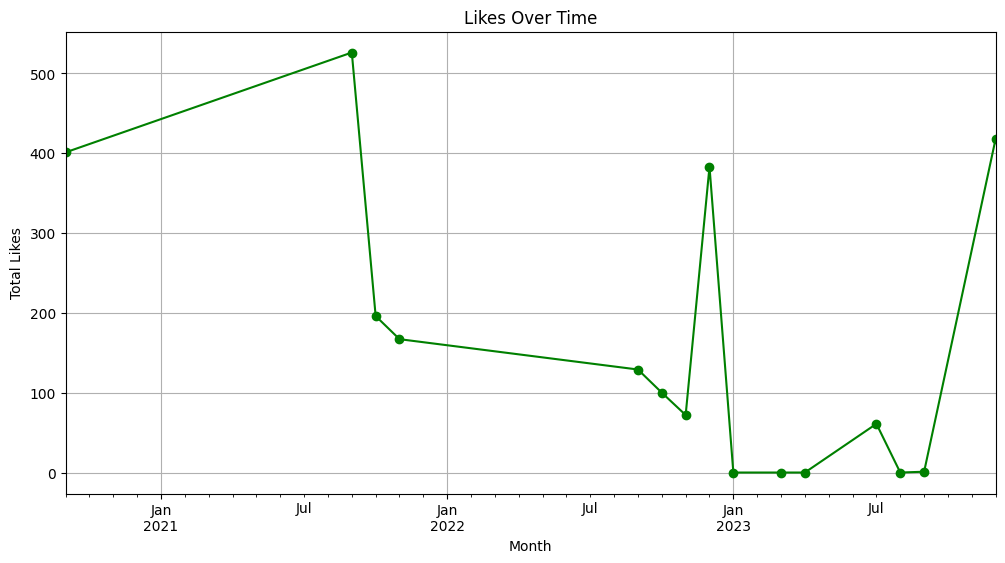

In [5]:
import matplotlib.pyplot as plt

likes_per_month = df.groupby(df['date'].dt.to_period('M'))['likesCount'].sum()

plt.figure(figsize=(12,6))
likes_per_month.plot(kind='line', marker='o', color='green')
plt.title('Likes Over Time')
plt.xlabel('Month')
plt.ylabel('Total Likes')
plt.grid(True)
plt.show()


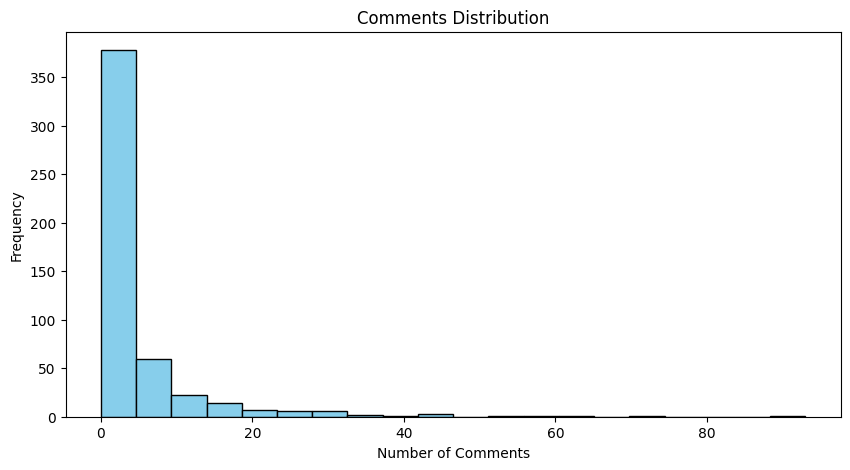

In [12]:
plt.figure(figsize=(10,5))
plt.hist(df['commentsCount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Comments Distribution')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


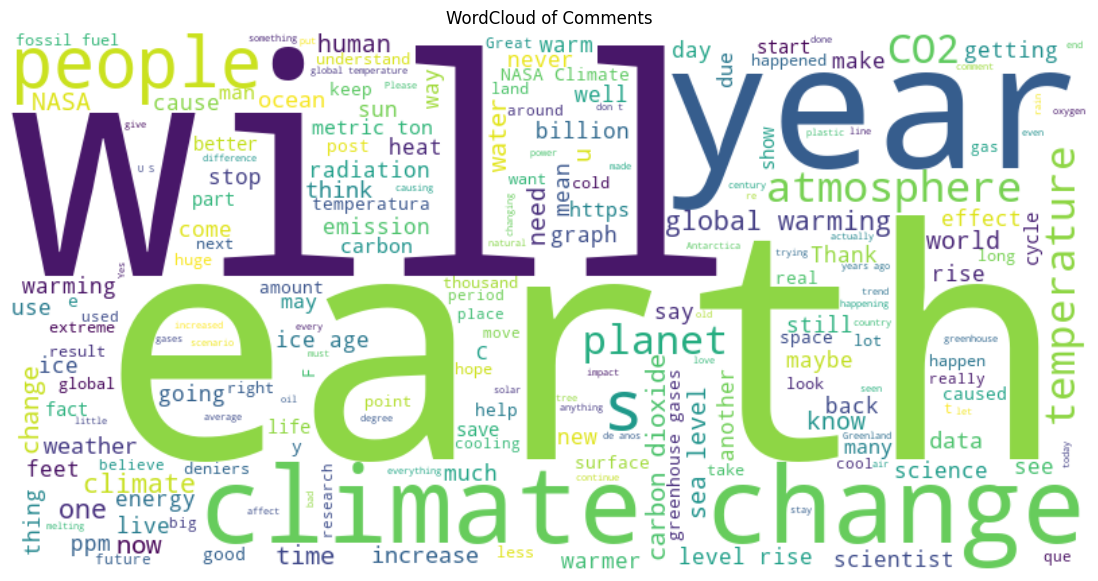

In [13]:
from wordcloud import WordCloud, STOPWORDS

text_data = df['text'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=STOPWORDS).generate(text_data)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Comments')
plt.show()


In [14]:
from textblob import TextBlob

# Sentiment polarity
df['Sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Positive / Negative / Neutral label
df['Sentiment_Label'] = df['Sentiment'].apply(lambda s: 'Positive' if s>0 else ('Negative' if s<0 else 'Neutral'))

# Plot
sentiment_counts = df['Sentiment_Label'].value_counts()
plt.figure(figsize=(8,5))b
sentiment_counts.plot(kind='bar', color=['green','red','gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


ModuleNotFoundError: No module named 'textblob'

In [15]:
!pip install textblob



  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached regex-2025.9.18-cp313-cp313-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 4.6 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.7 MB/s  0:00:00

   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   -------- -------------------

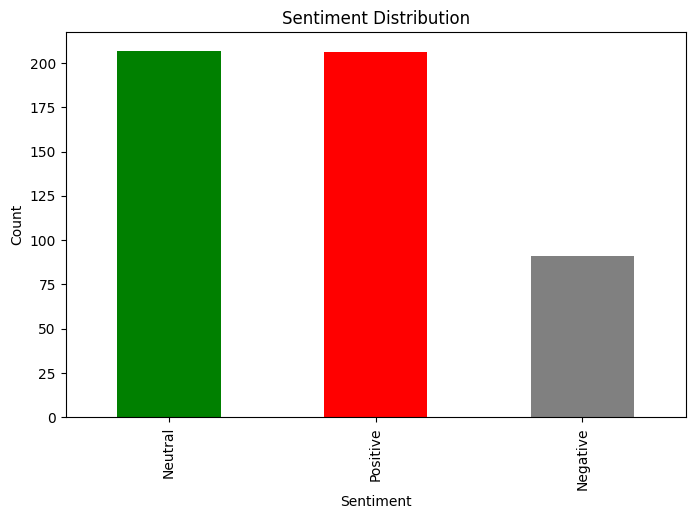

In [6]:
from textblob import TextBlob

# Sentiment polarity
df['Sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Positive / Negative / Neutral label
df['Sentiment_Label'] = df['Sentiment'].apply(lambda s: 'Positive' if s>0 else ('Negative' if s<0 else 'Neutral'))

# Plot
sentiment_counts = df['Sentiment_Label'].value_counts()
plt.figure(figsize=(8,5))
sentiment_counts.plot(kind='bar', color=['green','red','gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()